<a href="https://colab.research.google.com/github/Navin-Lakshman-S/Medical-AI-Assistant/blob/main/VIS_llava%2BwhipREALGRADIO_VIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q -U transformers
!pip install -q bitsandbytes accelerate
!pip install -q git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gtts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import torch
from transformers import BitsAndBytesConfig

In [4]:
quant_config= BitsAndBytesConfig(
    load_in_8bit=True,
    bnb_8bit_compute_dtype=torch.float64

)

In [5]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

# pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quant_config})
pipe = pipeline("image-text-to-text", model=model_id, model_kwargs={"quantization_config": quant_config})

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Device set to use cuda:0


In [6]:
import whisper
import gradio as gr
import time
import os
import warnings
from gtts import gTTS
from PIL import Image

In [7]:
image_path="img1.jpg"

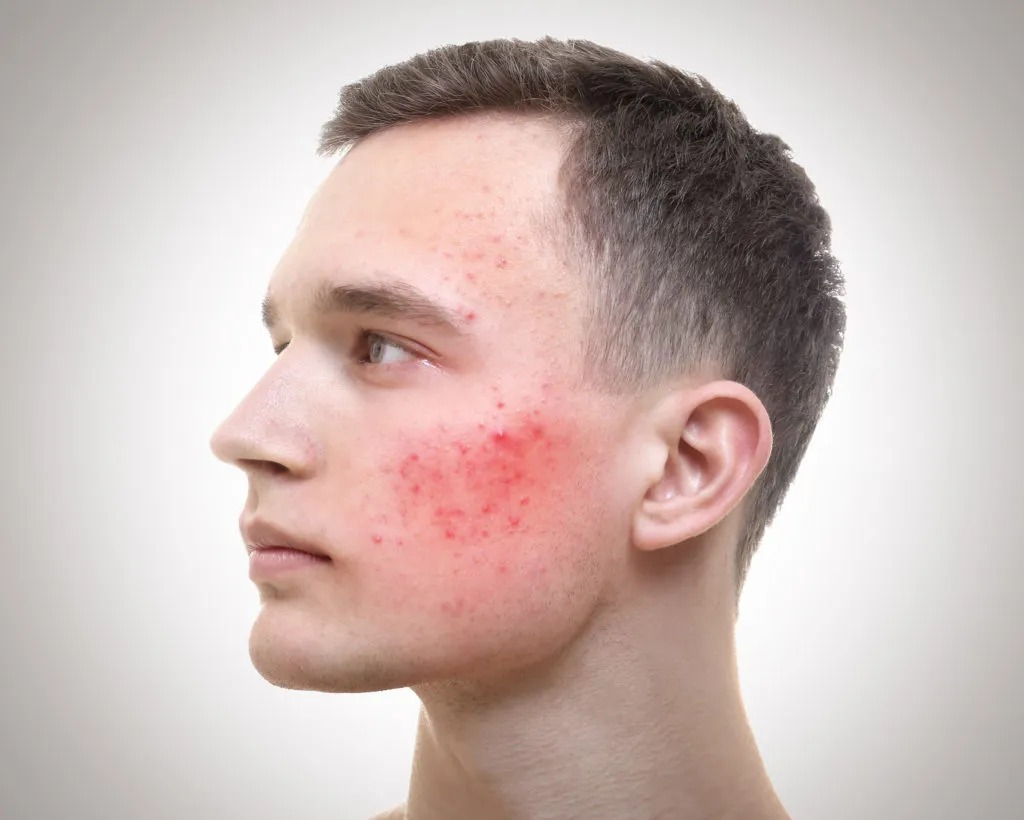

In [9]:
img=Image.open(image_path)
img

In [10]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
max_token=250

In [12]:
prompt_instructions="""You are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist """

In [13]:
prompt = "User: <image>\n\n" + prompt_instructions + "\n\nAssistant:  "

In [87]:
output = pipe(images=img, text=prompt, generate_kwargs={"max_new_tokens": max_token})

In [88]:
output

[{'input_text': 'User: <image>\n\nYou are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist \n\nAssistant:  ',
  'generated_text': 'User: <image>\n\nYou are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist \n\nAssistant:  \nBased on the image, the man has a red spot on his face, which could be an acne or a skin condition. It is important to consult a dermatologist for a proper diagnosis and treatment. In the meantime, the man can practice good skin care habits, such as using a gentle cleanser, applying sunscreen, and avoiding excessive sun exposure. Additionally, he should avoid picking or squeezing the spot, as this can lead to further irritation or infection.'}]

In [16]:
b=(output[0]['generated_text']).split()
print("b",b)
print()
print()
p=False
for f in b:
  if(f=="Assistant:"):
    p=True
    continue
  if(p):
    print(f,end=" ")

b ['User:', '<image>', 'You', 'are', 'an', 'helpful', 'medical', 'AI', 'Assistant,', 'you', 'help', 'peoples', 'by', 'viewing', 'their', 'skin', 'through', 'images', 'and', 'diagnose', 'it', 'and', 'provide', 'medical', 'advisories', 'and', 'diagnose', 'them', 'without', 'a', 'dermatologist', 'Assistant:', 'Based', 'on', 'the', 'image,', 'the', 'man', 'has', 'a', 'red', 'spot', 'on', 'his', 'face,', 'which', 'could', 'be', 'an', 'acne', 'or', 'a', 'skin', 'condition.', 'It', 'is', 'important', 'to', 'consult', 'a', 'dermatologist', 'for', 'a', 'proper', 'diagnosis', 'and', 'treatment.', 'In', 'the', 'meantime,', 'the', 'man', 'can', 'practice', 'good', 'skin', 'care', 'habits,', 'such', 'as', 'using', 'a', 'gentle', 'cleanser,', 'applying', 'sunscreen,', 'and', 'avoiding', 'excessive', 'sun', 'exposure.', 'Additionally,', 'he', 'should', 'avoid', 'picking', 'or', 'squeezing', 'the', 'spot,', 'as', 'this', 'can', 'lead', 'to', 'further', 'irritation', 'or', 'infection.']


Based on the 

In [17]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [18]:
for sent in sent_tokenize(output[0]['generated_text']):
  print(sent)

User: <image>

You are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist 

Assistant:  
Based on the image, the man has a red spot on his face, which could be an acne or a skin condition.
It is important to consult a dermatologist for a proper diagnosis and treatment.
In the meantime, the man can practice good skin care habits, such as using a gentle cleanser, applying sunscreen, and avoiding excessive sun exposure.
Additionally, he should avoid picking or squeezing the spot, as this can lead to further irritation or infection.


In [19]:
import numpy as np

In [20]:
torch.__version__

'2.6.0+cu124'

In [21]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dev

device(type='cuda')

In [22]:
torch.device

torch.device

In [23]:
mod = whisper.load_model("medium",device=dev)

100%|█████████████████████████████████████| 1.42G/1.42G [00:48<00:00, 31.4MiB/s]


In [24]:
mod.is_multilingual

True

In [25]:
d=[]
# d=sum(np.prod(i.shape) for i in mod.parameters())
for i in mod.parameters():
  d.append(np.prod(i.shape))
print(d)
print(sum(d))
# print(d)

[245760, 1024, 3145728, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024, 1048576, 1024, 1048576, 1048576, 1024, 1048576, 1024, 1024, 1024, 4194304, 4096, 4194304, 1024, 1024, 1024

In [26]:
import re
import datetime

In [27]:
match = re.search(r'Assistant:\s* (.*)', output[0]["generated_text"])
if match:
    extracted_text = match.group(1)
    print(extracted_text)
else:
    print("No match found.")

In [28]:
for sent in sent_tokenize(output[0]["generated_text"]):
    print(sent)

User: <image>

You are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist 

Assistant:  
Based on the image, the man has a red spot on his face, which could be an acne or a skin condition.
It is important to consult a dermatologist for a proper diagnosis and treatment.
In the meantime, the man can practice good skin care habits, such as using a gentle cleanser, applying sunscreen, and avoiding excessive sun exposure.
Additionally, he should avoid picking or squeezing the spot, as this can lead to further irritation or infection.


In [54]:
import datetime
import os

tstamp = datetime.datetime.now()
tstamp = str(tstamp).replace(' ','_')
logfile = f'{tstamp}_log.txt'
def writehistory(text):
    with open(logfile, 'a', encoding='utf-8') as f:
        f.write(text)
        f.write('\n')
    f.close()

In [155]:
import re
import requests
from PIL import Image

def img2txt(input_text, input_image):


    ipimg = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
        You are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist also describe the image
        """
    else:
        prompt_instructions = """You are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist also describe the image""" + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "USER: <image>\n"+ prompt_instructions + "please help me treat by giving advice and safety measures to take! please! don't say i'm sorry or i'm not a dermatologist, just give some general methods to treat " + "\nASSISTANT:"

    # outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
    outputs = pipe(images=ipimg, text=prompt, generate_kwargs={"max_new_tokens": 512})


    if outputs is not None and len(outputs[0]["generated_text"]) > 0:
        match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"],re.DOTALL)
        if match:

            reply = match.group(1)
        else:
            reply = "No response found."
    else:
        reply = "No response generated."

    return reply



In [156]:
# def img2txt(input_text, input_image):
#     image = Image.open(input_image)

#     # Format the prompt exactly like your working example
#     user_query = f"<image> You are an helpful medical AI Assistant, you help peoples by viewing their skin through images and diagnose it and provide medical advisories and diagnose them without a dermatologist, also give some first-aid like measures to treat people with some small remedies"

#     # Use the exact same formatting that worked in your test
#     outputs = pipe(images=image, text=user_query, generate_kwargs={"max_new_tokens": max_token})

#     # Process the output
#     # if outputs and len(outputs) > 0 and "generated_text" in outputs[0]:
#     #     result = outputs[0]["generated_text"]
#     #     # Extract just the assistant's response portion
#     #     match = re.search(r'Assistant:(.*)', result, re.DOTALL)
#     #     if match:
#     #         reply = match.group(1).strip()
#     #     else:
#     #         reply = result
#     # else:
#     #     reply = "No response generated."
#     b=(outputs[0]['generated_text']).split()
#     # print("b",b)
#     # print()
#     # print()
#     reply=""
#     p=False
#     for f in b:
#       if(f=="Assistant:"):
#         p=True
#         continue
#       if(p):
#         reply+=f
#         reply+=" "

#     return reply

In [157]:
# def img2txt(input_text, input_image):
#     image = Image.open(input_image)

#     # Create a more nuanced prompt that might work within safety bounds
#     prompt_instructions = """
#     Analyze the visible characteristics in this skin image. Describe what you observe
#     in detail - such as color, texture, pattern, and location. While you cannot provide
#     a definitive diagnosis, you can discuss general information about similar-looking
#     skin conditions, common care approaches, and when someone might want to consult a
#     healthcare provider. Make it clear that this is educational information only and
#     not medical advice.
#     """

#     # Format the prompt properly
#     if input_text and not isinstance(input_text, tuple):
#         user_query = f"<image>\nI have this skin condition. {input_text}"
#     else:
#         user_query = "<image>\nI have this skin condition. Can you provide information about it?"

#     # Run the model
#     outputs = pipe(images=image, text=user_query, generate_kwargs={"max_new_tokens": max_token})

#     # Process the output

#     if outputs is not None and len(outputs[0]["generated_text"]) > 0:
#         match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
#         if match:

#             reply = match.group(1)
#         else:
#             reply = "No response found."
#     else:
#         reply = "No response generated."

#     return reply

In [158]:
def transcribe(audio):


    if audio is None or audio == '':
        return ('','',None)


    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(mod.device)

    _, probs = mod.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(mod, mel, options)
    result_text = result.text

    return result_text

In [159]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [160]:
def text_to_speech(text, file_path):
    language = 'en'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path



In [161]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [151]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [162]:
import gradio as gr
import base64
import os


def process_inputs(audio_path, image_path):

    speech_to_text_output = transcribe(audio_path)


    if image_path:
        llava_output = img2txt(speech_to_text_output, image_path)
    else:
        llava_output = "No image provided."



    processed_audio_path = text_to_speech(llava_output, "Temp3.mp3")

    return speech_to_text_output, llava_output, processed_audio_path


In [163]:
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="AI Assistant Response"),
        gr.Audio("Temp.mp3")
    ],
    title="Welcome to AI skin Assistant, ask and know about your skinproblems",
    description="Upload an image and interact via voice input and audio response."
)

In [ ]:
iface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://87b36add5a5fd20485.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
